<a href="https://colab.research.google.com/github/BossAyush07/Deep-Learning-Projects/blob/master/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"boss0ayush","key":"1fa540a28ee73b9f1504169bfda092c7"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 91% 110M/121M [00:00<00:00, 103MB/s]  
100% 121M/121M [00:01<00:00, 124MB/s]


In [5]:
!unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating: images/validation/fear/9606.jpg  
  inflating:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Input, Conv2D, Activation, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import MobileNet
from keras.callbacks import ModelCheckpoint

In [39]:
print(os.listdir())
train_path = './train/'
validation_path = './validation/'

['train', 'validation']


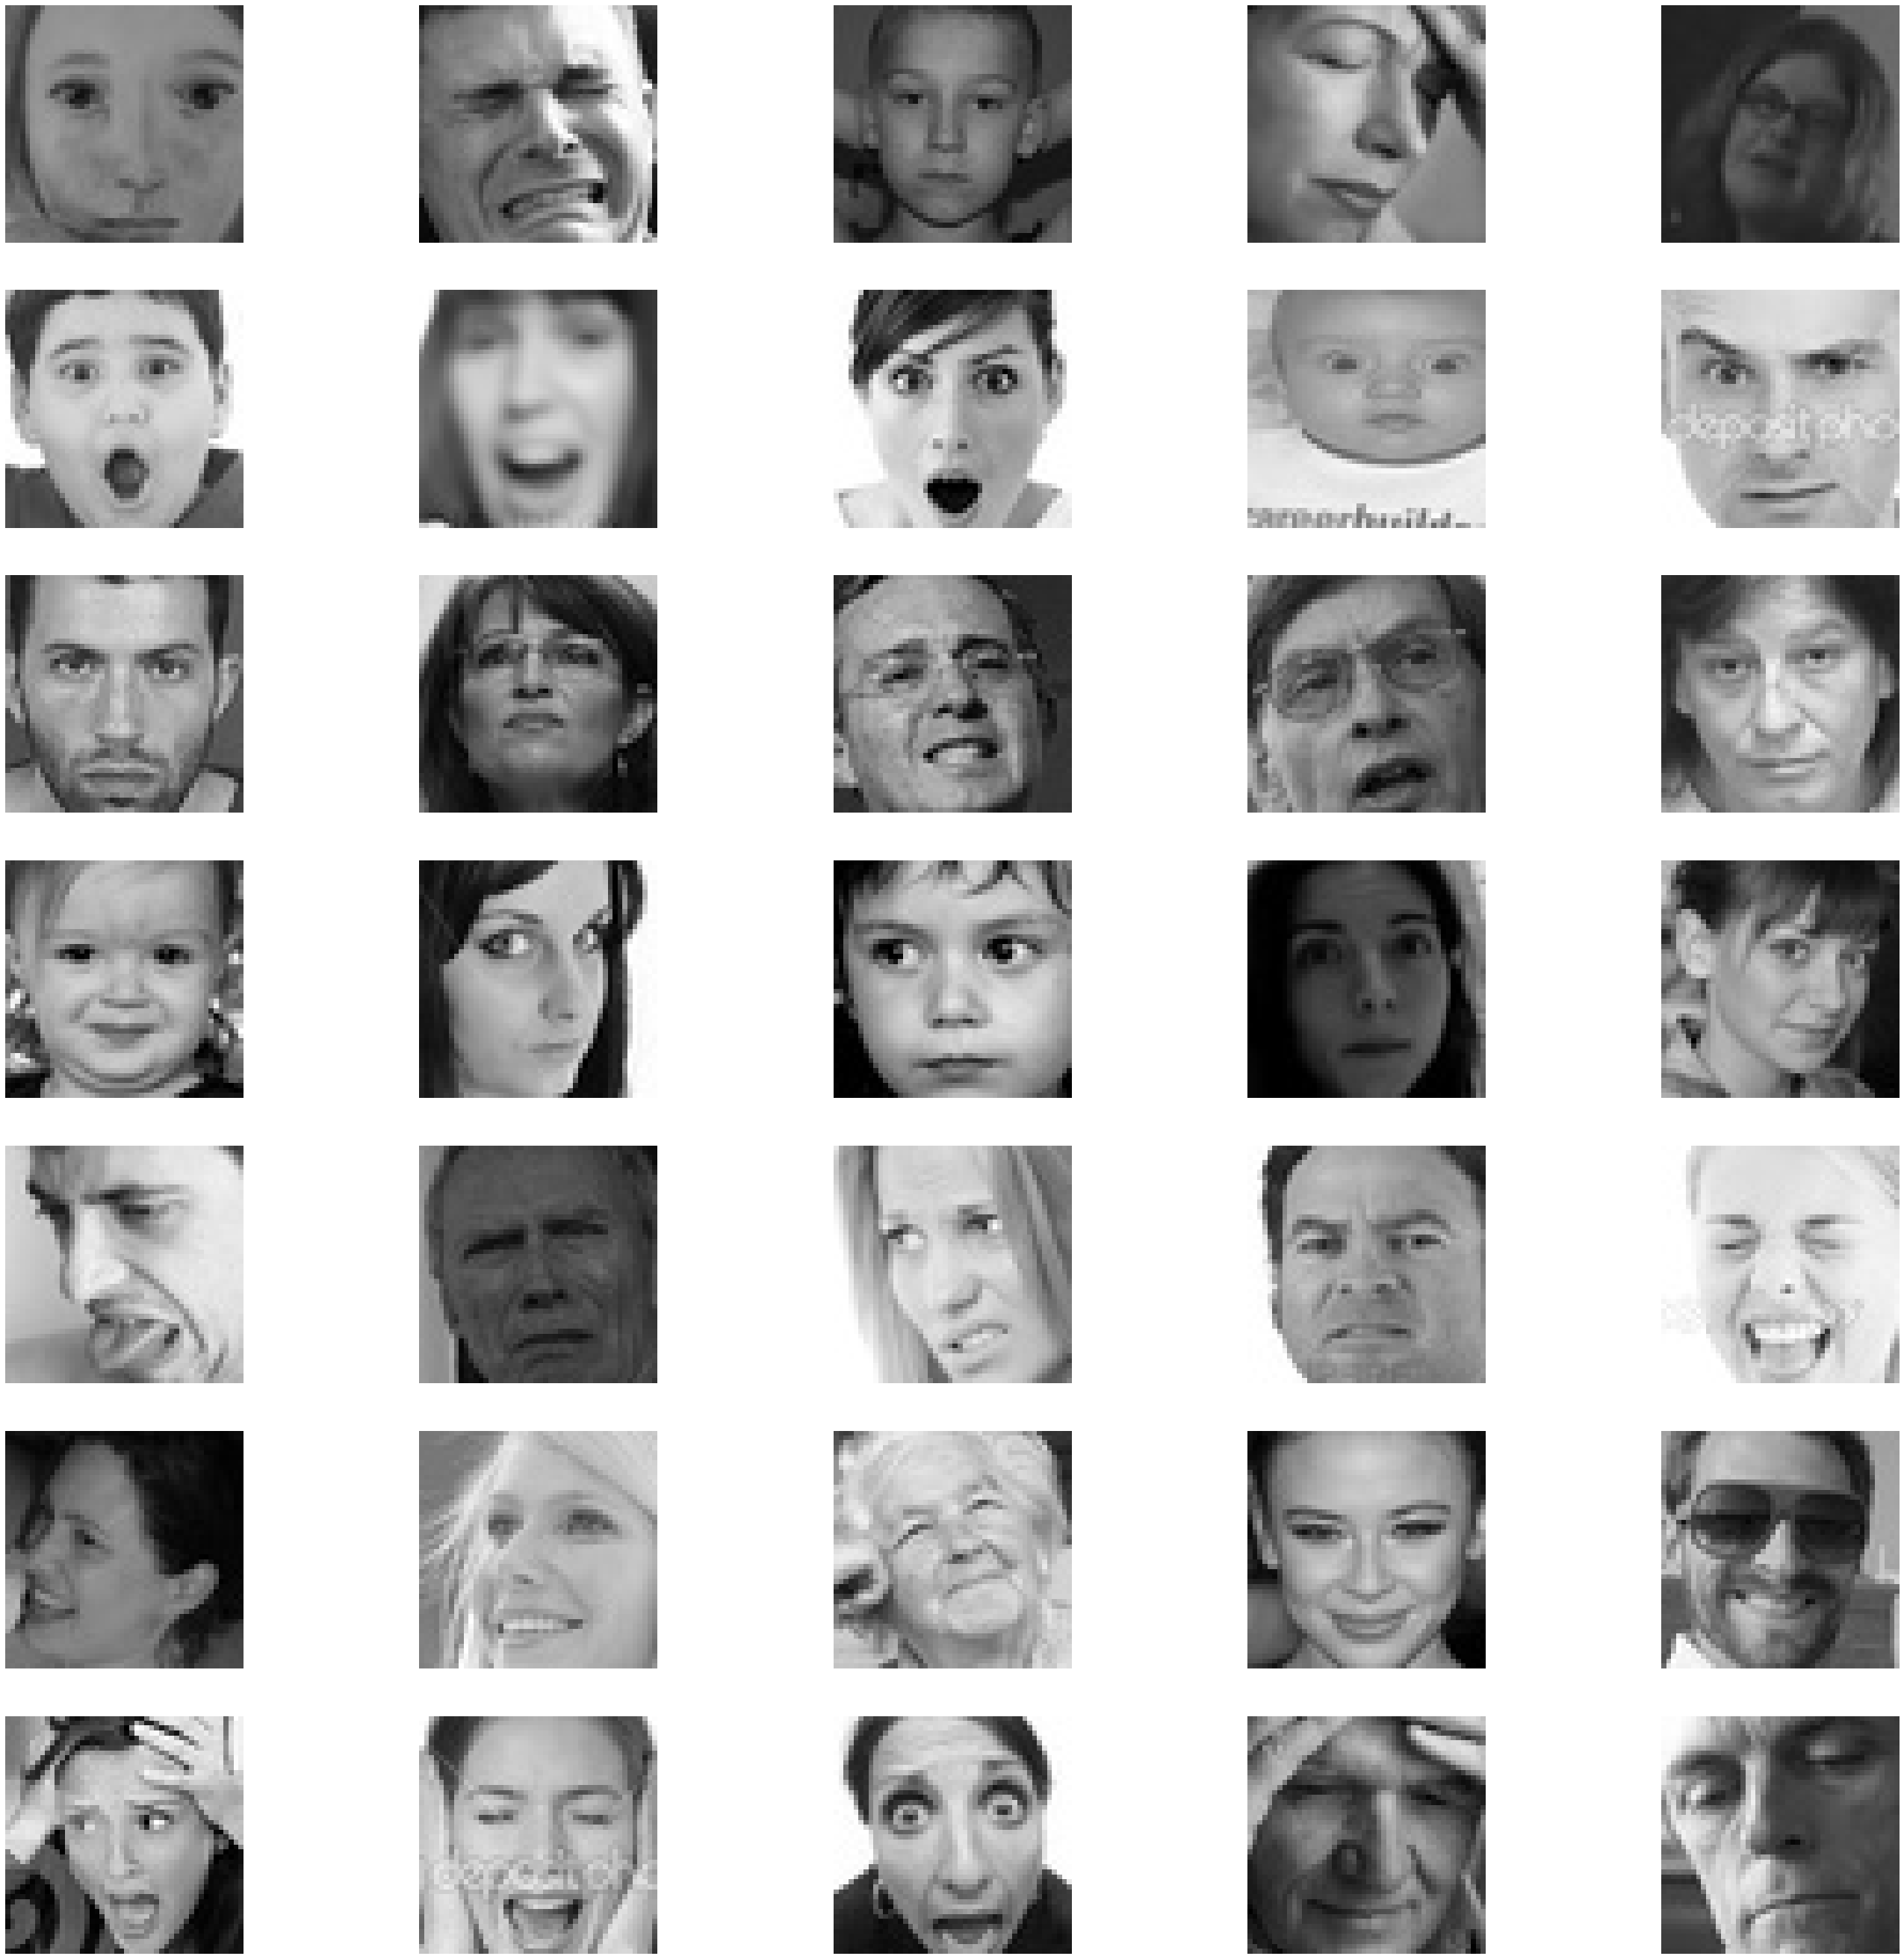

In [38]:
plt.figure(0, figsize=(48,48))
cpt = 0

for expression in os.listdir(train_path):
    for i in range(1,6):
        cpt = cpt + 1
        sp=plt.subplot(7,5,cpt)
        sp.axis('Off')
        img_path = train_path + expression + "/" +os.listdir(train_path + expression)[i]
        img = load_img( img_path, target_size=(48,48))
        plt.imshow(img, cmap="gray")


plt.show()

In [40]:
for expression in os.listdir(train_path):
    print(str(len(os.listdir(train_path + expression))) + " " + expression + " images")

4938 sad images
3205 surprise images
3993 angry images
4982 neutral images
436 disgust images
7164 happy images
4103 fear images


In [45]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(train_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(validation_path,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [46]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)      

In [47]:
# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
225/225 [==============================] - 41s 184ms/step - loss: 2.0394 - accuracy: 0.2310 - val_loss: 2.3511 - val_accuracy: 0.3021
Epoch 2/50
  1/225 [..............................] - ETA: 36s - loss: 1.8960 - accuracy: 0.2031

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


225/225 [==============================] - 39s 175ms/step - loss: 1.8424 - accuracy: 0.2902 - val_loss: 2.5480 - val_accuracy: 0.3387
Epoch 3/50
225/225 [==============================] - 40s 176ms/step - loss: 1.7398 - accuracy: 0.3325 - val_loss: 2.4051 - val_accuracy: 0.3469
Epoch 4/50
225/225 [==============================] - 40s 176ms/step - loss: 1.6633 - accuracy: 0.3681 - val_loss: 2.8321 - val_accuracy: 0.3655
Epoch 5/50
225/225 [==============================] - 40s 177ms/step - loss: 1.6110 - accuracy: 0.3819 - val_loss: 2.1049 - val_accuracy: 0.4076
Epoch 6/50
225/225 [==============================] - 40s 177ms/step - loss: 1.5593 - accuracy: 0.4018 - val_loss: 1.4141 - val_accuracy: 0.4337
Epoch 7/50
225/225 [==============================] - 40s 176ms/step - loss: 1.5140 - accuracy: 0.4177 - val_loss: 1.7827 - val_accuracy: 0.4438
Epoch 8/50
225/225 [==============================] - 39s 175ms/step - loss: 1.4670 - accuracy: 0.4363 - val_loss: 1.5862 - val_accuracy: 0.4